APPROACH
---

* Import libaries
*  Load Dataset
* Analyze the Data
*  Perform EDA
*  Data preperation / Transformation
*  Applying the models
*  Comparing Accuracies
*  Deployment

**IMPORTING LIBRARIES**

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import pickle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**LOADING THE DATASET**

---

In [2]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding= 'ISO-8859-1', encoding_errors = 'strict')


In [3]:
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape


(5572, 5)

**ANALYZING THE DATA**

---

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


> * We see that cols 2,3 and 4 are unnecesary and contains a lot of null values
> * We will drop them off later

In [6]:
data.tail()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
data['v1'].value_counts()


ham     4825
spam     747
Name: v1, dtype: int64

> * We see that the data is imblanaced


**PERFORMING EDA**

---

> * We drop the last three columns as they are unnecessary and have a lot of null values


In [8]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [9]:
data.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


> * Encoding ham and spam using label encoder


In [10]:
encoder = LabelEncoder()
data['v1'] = encoder.fit_transform(data['v1'])

In [11]:
data.head()


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


> * Checking and removing duplicates


In [12]:
data.duplicated().sum()


403

In [13]:
data = data.drop_duplicates(keep='first')


In [14]:
data.duplicated().sum()


0

> * Finding the total number of words using tokenization (nltk)


In [15]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
data['words'] = data['v2'].apply(lambda x:len(nltk.word_tokenize(x)))


In [17]:
data.head()


,v1,v2,words
0,0,"Go until jurong point, crazy.. Available only ...",23
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


> *  Checking data distribution for the number of words for ham and spam


In [18]:
data[data['v1']==0][['words']].describe()


,words
count,4516.000000
mean,16.957484
std,13.394052
min,1.000000
25%,8.000000
50%,13.000000
75%,22.000000
max,219.000000


In [19]:
data[data['v1']==1][['words']].describe()


,words
count,653.000000
mean,27.474732
std,6.893007
min,2.000000
25%,25.000000
50%,29.000000
75%,32.000000
max,44.000000


<Axes: xlabel='words', ylabel='Count'>

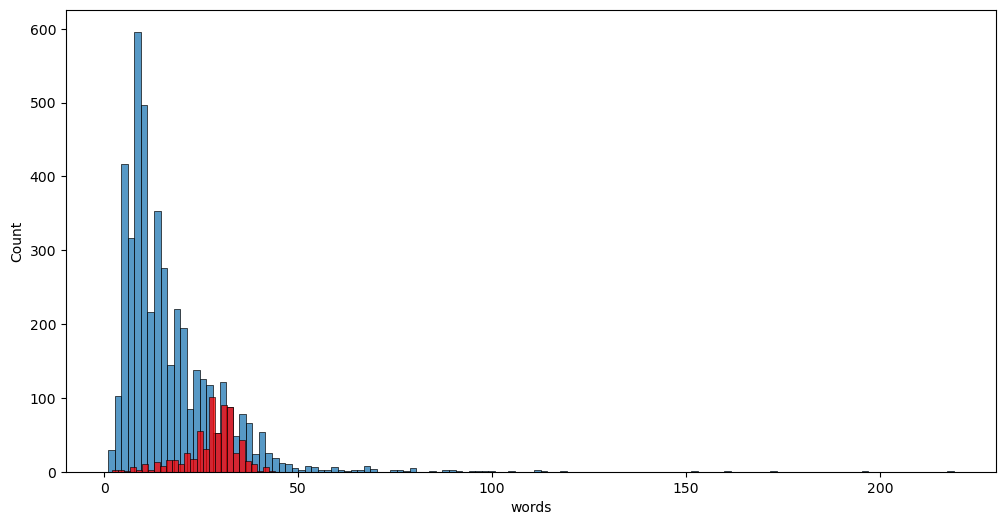

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['v1'] == 0]['words'])
sns.histplot(data[data['v1'] == 1]['words'],color='red')

> * We see that spam has usually more number of words even tho ham has a larger distribution


**DATA PREPARATION/ TRANSFORMATION**

---


1. Lower case transformation
2. Tokenization
3. Removal of stop words
4. Punctuation and special characters removal
5. Stemming

In [21]:
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

> * Using the function above we can transform the text


In [22]:
data['after_transformation'] = data['v2'].apply(transform_text)


In [23]:
data.head()


,v1,v2,words,after_transformation
0,0,"Go until jurong point, crazy.. Available only ...",23,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,nah think goe usf live around though


> * Showing wordcloud of ham and spam data


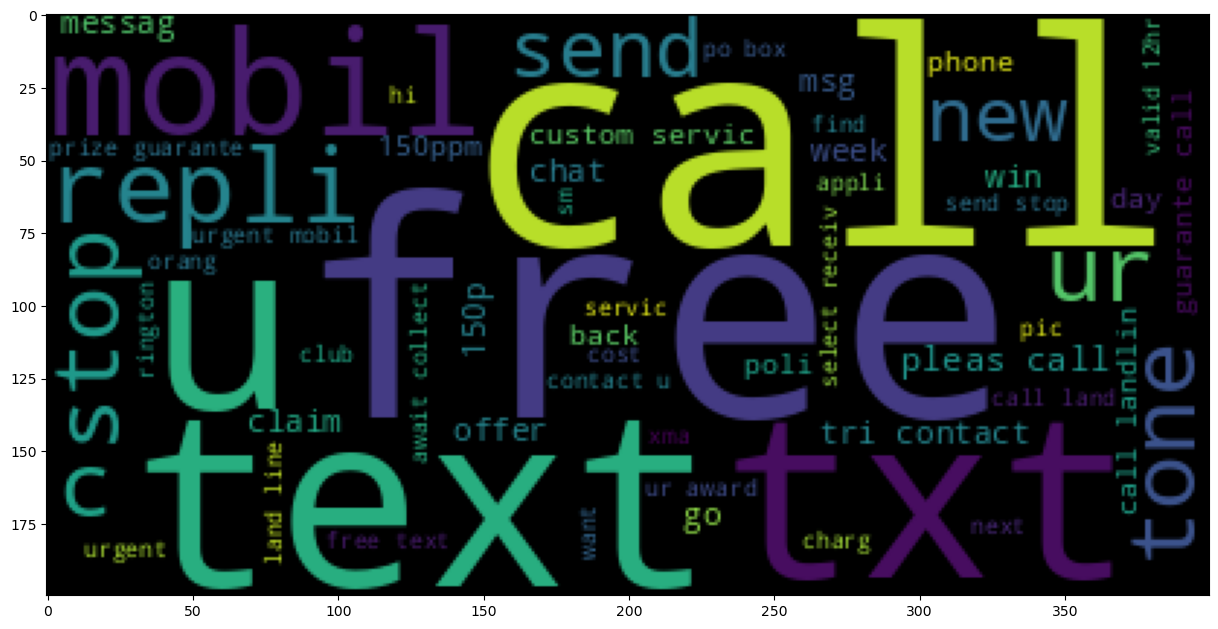

In [24]:
wc = WordCloud(min_font_size=8)
spam_wc = wc.generate(data[data['v1']==1]['after_transformation'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

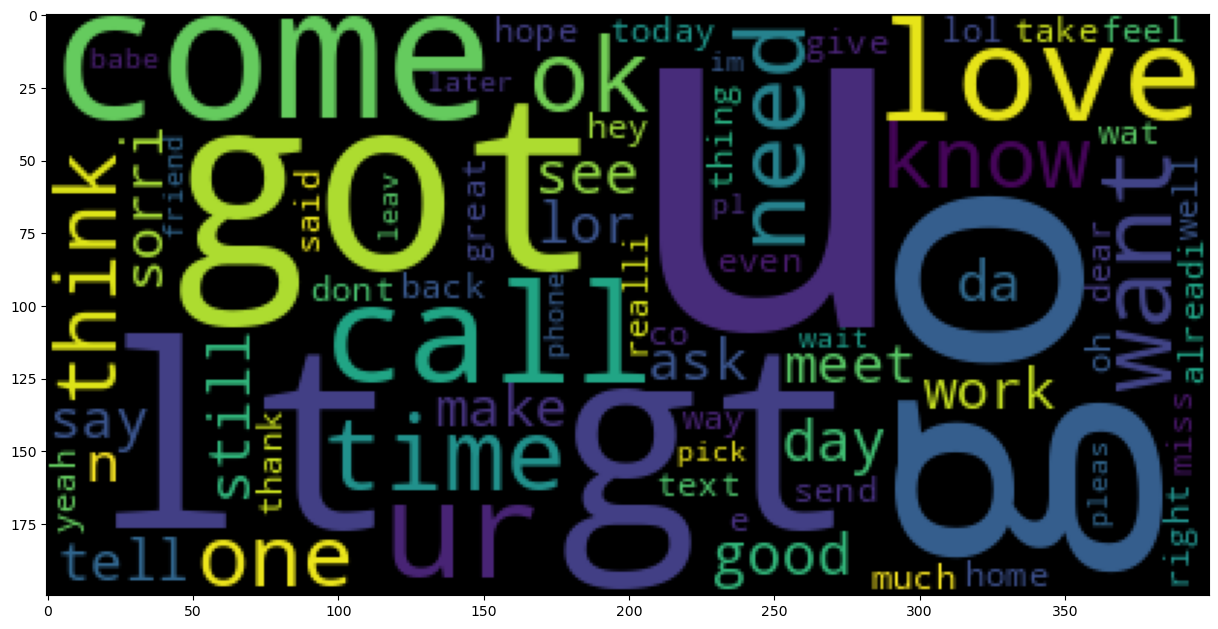

In [25]:
wc = WordCloud(min_font_size=8)
ham_wc = wc.generate(data[data['v1']==0]['after_transformation'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(ham_wc)

**MODEL BUILDING**

---

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

> * Splitting dataset into X and Y

In [27]:
X = tfidf.fit_transform(data['after_transformation']).toarray()


In [28]:
y = data['v1'].values

> * Spltting the data into train and test data

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

> * Accuracy report and evaluation function

In [30]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

> * Applying machine learning classification models

In [31]:
mnb = MultinomialNB()
dtree = DecisionTreeClassifier(max_depth=5)
ada = AdaBoostClassifier(n_estimators=50, random_state=2)
rf = RandomForestClassifier(n_estimators=50, random_state=2)

> * Fitting the model to the train data

In [32]:
mnb.fit(X_train, y_train)
dtree.fit(X_train, y_train)
ada.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

> * Prediction

In [33]:
mnbtrain = mnb.predict(X_train)
mnbtest = mnb.predict(X_test)

dtreetrain = dtree.predict(X_train)
dtreetest = dtree.predict(X_test)

adatrain = ada.predict(X_train)
adatest = ada.predict(X_test)

rftrain = rf.predict(X_train)
rftest = rf.predict(X_test)

**COMPARING ACCURACIES**

---

In [34]:
print(acc_report(y_train, mnbtrain))
print(acc_report(y_test, mnbtest))


the accuracy of tha model is  0.9787182587666263
[[3618    2]
 [  86  429]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3620
           1       1.00      0.83      0.91       515

    accuracy                           0.98      4135
   macro avg       0.99      0.92      0.95      4135
weighted avg       0.98      0.98      0.98      4135

None
the accuracy of tha model is  0.9729206963249516
[[896   0]
 [ 28 110]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.80      0.89       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

None


For MultinomialNB

1. Train accuracy = 97.87%
2. Test accuracy = 97.29%


In [35]:
print(acc_report(y_train, dtreetrain))
print(acc_report(y_test, dtreetest))

the accuracy of tha model is  0.9492140266021766
[[3586   34]
 [ 176  339]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3620
           1       0.91      0.66      0.76       515

    accuracy                           0.95      4135
   macro avg       0.93      0.82      0.87      4135
weighted avg       0.95      0.95      0.95      4135

None
the accuracy of tha model is  0.9332688588007737
[[881  15]
 [ 54  84]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       896
           1       0.85      0.61      0.71       138

    accuracy                           0.93      1034
   macro avg       0.90      0.80      0.84      1034
weighted avg       0.93      0.93      0.93      1034

None


For DecisionTreeClassifier

1. Train accuracy = 94.92%
2. Test accuracy = 93.13%

In [36]:
print(acc_report(y_train, adatrain))
print(acc_report(y_test, adatest))

the accuracy of tha model is  0.9719467956469166
[[3603   17]
 [  99  416]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3620
           1       0.96      0.81      0.88       515

    accuracy                           0.97      4135
   macro avg       0.97      0.90      0.93      4135
weighted avg       0.97      0.97      0.97      4135

None
the accuracy of tha model is  0.9642166344294004
[[888   8]
 [ 29 109]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.93      0.79      0.85       138

    accuracy                           0.96      1034
   macro avg       0.95      0.89      0.92      1034
weighted avg       0.96      0.96      0.96      1034

None


For AdaBoostClassifier

1. Train accuracy = 97.19%
2. Test accuracy = 96.42%

In [37]:
print(acc_report(y_train, rftrain))
print(acc_report(y_test, rftest))

the accuracy of tha model is  0.999758162031439
[[3620    0]
 [   1  514]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3620
           1       1.00      1.00      1.00       515

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135

None
the accuracy of tha model is  0.971953578336557
[[893   3]
 [ 26 112]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.81      0.89       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

None


For RandomForestClassifier

1. Train accuracy = 99.97%
2. Test accuracy = 97.19%

**conlusion: We choose MultinomialNB as our model as it has a low bias and low varience**

**DEPLOYMENT**

---

> * Importing the model and the vectorizer

In [38]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [74]:
%%writefile app.py
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

def main():


    tfidf = pickle.load(open('/kaggle/working/vectorizer.pkl', 'rb'))
    model = pickle.load(open('/kaggle/working/model.pkl', 'rb'))

    st.title("SPAM EMAIL CLASSIFIER")

    input_text = st.text_area("Enter the email")

    ps = PorterStemmer()

    def transform_text(text):
        text = text.lower()
        text = nltk.word_tokenize(text)

        y = []
        for i in text:
            if i.isalnum():
                y.append(i)

        text = y[:]
        y.clear()

        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)

        text = y[:]
        y.clear()

        for i in text:
            y.append(ps.stem(i))


        return " ".join(y)

    if st.button('Detect'):
        transformed_input = transform_text(input_text)
        vectorizedd = tfidf.transform([transformed_input])
        result = model.predict(vectorizedd)[0]

        if result==1:
            st.header("Spam")
        else:
            st.header("Genuine")
            
if __name__ == '__main__':
    main()

Overwriting app.py


In [75]:
!ngrok authtoken 1naoCTHqT6mNHfddeg1IlaCB2B7_5VYGHXTgxWDzkxey2tNEq

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [76]:
get_ipython().system_raw('/kaggle/working/ngrok http 8501 &')

In [77]:
!curl -s http://localhost:4040/api/tunnels | python -c \
        "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
https://c3fe-35-234-62-72.ngrok-free.app


In [78]:
!streamlit run /kaggle/working/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.19.2.2:8501
  External URL: http://35.234.62.72:8501

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
^C
  Stopping...
